# <span style="color:brown;">Optimization Standard Form</span>

An optimization problem in standard form is expressed as:

    minimize    f₀(x)
    subject to  fᵢ(x) ≤ 0,  i = 1, ..., m
                hⱼ(x) = 0,  j = 1, ..., p

where:
- x ∈ ℝⁿ is the optimization variable (decision variable)
- f₀(x) is the objective function (cost function)
- fᵢ(x) ≤ 0 are inequality constraint functions
- hⱼ(x) = 0 are equality constraint functions
- m ≥ 0 is the number of inequality constraints
- p ≥ 0 is the number of equality constraints

## Optimal Value

The optimal value is defined as:

    p* = inf{f₀(x) | fᵢ(x) ≤ 0, i = 1,...,m, hⱼ(x) = 0, j = 1,...,p}

Special cases:
- p* = ∞ if problem is infeasible (no x satisfies the constraints)
- p* = -∞ if problem is unbounded below

# <span style="color:brown;">CONVEX Optimization Standard Form</span>

For convex optimization problems, standard form requires:

    minimize    f₀(x)
    subject to  fᵢ(x) ≤ 0,  i = 1, ..., m
                aᵢᵀx = bᵢ,  i = 1, ..., p

Additional requirements:
- f₀, f₁, ..., fₘ are CONVEX functions
- Equality constraints are AFFINE (linear)
- The feasible set is convex

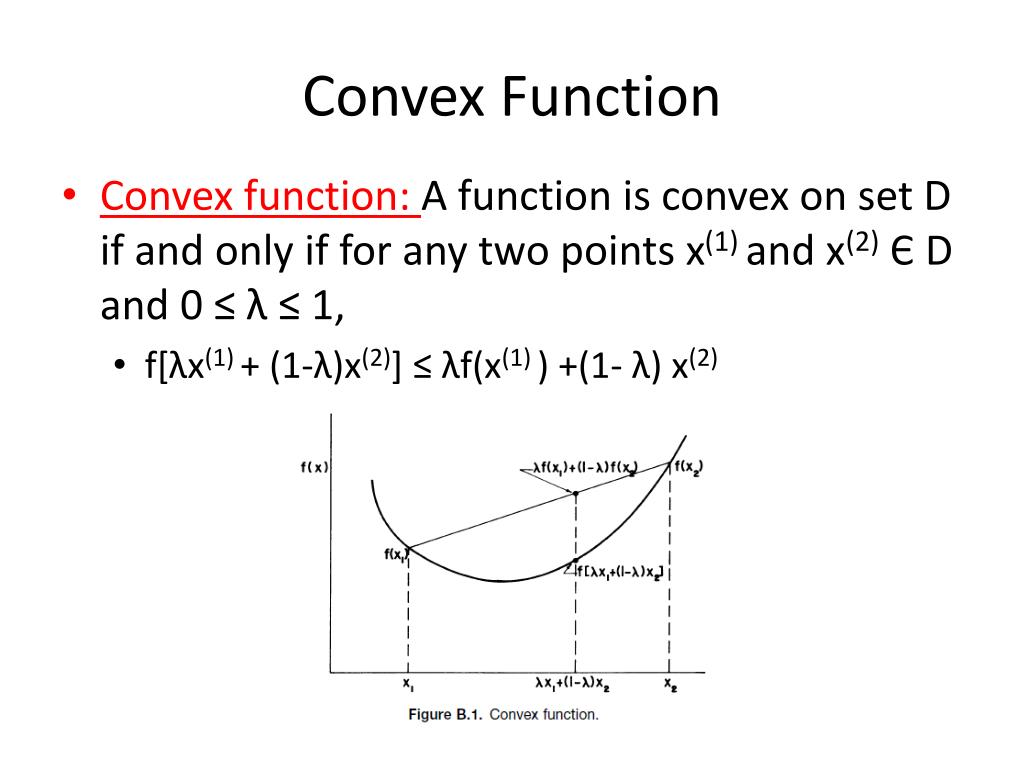

# <span style="color:brown;">Linear Programming (LP)</span>

## Consider the optimization problem

minimize    f₀(x₁, x₂) = x₁ + x₂.

subject to  
+ 2x₁ + x₂ ≥ 1
+ x₁ + 3x₂ ≥ 1
+ x₁ ≥ 0,    
+ x₂ ≥ 0.

In [1]:
import cvxpy as cp
import numpy as np

# Define variables
x1 = cp.Variable(name = "x1")
x2 = cp.Variable(name = "x2")

# Define the constraints
opt_constraints = [
    -2*x1 - x2 <= -1, # 2x₁ + x₂ ≥ 1
    -x1 - 3*x2 <= -1, # x₁ + 3x₂ ≥ 1
    -x1 <= 0, # x₁ ≥ 0
    -x2 <= 0  # x₂ ≥ 0
]

# Define objective
objective = cp.Minimize(x1 + x2)

# Define problem: objective + constraints
problem = cp.Problem(
    objective = objective,
    constraints = opt_constraints
)

# Solve the problem
problem.solve()

print(
    (
        f"Status: {problem.status}\n"
        f"Optimal Value: {problem.value}\n"
        f"Optimal variables: {x1.value, x2.value}"
    )
)

Status: optimal
Optimal Value: 0.6000000001640435
Optimal variables: (array(0.4), array(0.2))


# <span style="color:brown;">Quadratic Programming</span>

minimize:    (1/2) xᵀPx + qᵀx + r

subject to:  -1 ≤ xᵢ ≤ 1,   i = 1, 2, 3,

where

P = [[13   12   -2], [12   17    6], [-2    6   12]]  

q = [ -22.0 -14.5 13.0 ]

r = 1.

In [2]:
import cvxpy as cp
import numpy as np

# Define variable
x = cp.Variable(name = "x", shape = (3,1))

# Define constants
P = cp.Constant(
    name = "P",
    value = np.array([
        [13, 12, -2],
        [12, 17, 6],
        [-2, 6, 12]
    ])
)

q = cp.Constant(
    name = "q",
    value = np.array([-22, -14.5, 13])
)

r = cp.Constant(name = "r", value = 1)

# Define problem and solve
problem = cp.Problem(
    objective = cp.Minimize(0.5*cp.quad_form(x, P) + q.T@x + r), # Must use cp.quad_form() instead of x.T@P@x to achieve DCP
    constraints = [
        x <= 1,
        -x <= 1 # x >= -1
    ]

)

problem.solve(solver = 'CLARABEL') # Solve problem using CLARABEL solver

print(
    (
        f"Status: {problem.status}\n"
        f"Optimal Value: {problem.value}\n"
        f"Optimal variables: {x.value.flatten()}" # Use .flatten() to convert 2D array to 1D for better readability
    )
)

Status: optimal
Optimal Value: -21.62499998049554
Optimal variables: [ 0.99999999  0.50000001 -1.        ]
